In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

### Importing The DataSet

In [2]:
df_train = pd.read_excel(r"C:\Users\lokes\OneDrive\Desktop\ml project\flight price\Data_Train.xlsx")
df_test = pd.read_excel(r"C:\Users\lokes\OneDrive\Desktop\ml project\flight price\Test_set.xlsx")

In [64]:
pd.set_option('display.max_column',200)

In [3]:
print(df_train.shape)
print(df_test.shape)

(10683, 11)
(2671, 10)


Out train dataset Contains 10683 rpws and 11 columns , in the test 2671 rows 10 columns.

In [4]:
df_train.head() # observing the 5 rows of the train data set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_test.head() # observing the 5 rows of the test data set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Null Value Treatment:

In found only 2 columns in train dataset where 1-1 null values present hence we can drop the entire row using below dropna method.

In [10]:
df_train.dropna(axis=0,inplace=True) # droping the bull value

In [11]:
df_train.isnull().sum() #rechecking the null value if any

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df_train.shape # shape of data

(10682, 11)

### Exploratry Data Analysis :

converting date into datetime format:

In [13]:
df_train["Date_of_Journey"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day 

In [14]:
df_test["Date_of_Journey"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day

As per abobve code we are converting date time into date time format and keeping only day.similarly we will create additional
colunmns by converting the 'Dep_Time' , 'Arrival_Time'.

In [15]:
#for departure hours
df_train["Dep_hour"] = pd.to_datetime(df_train.Dep_Time).dt.hour

#for departure min
df_train["Dep_min"] = pd.to_datetime(df_train.Dep_Time).dt.minute

In [16]:
df_train.drop(["Dep_Time"] , axis=1 ,inplace=True) #droping the 'Dep_Time' column because we have created the additional col

In [17]:
#for departure hours in our test datset
df_test["Dep_hour"] = pd.to_datetime(df_test.Dep_Time).dt.hour

#for departure min in our test datset
df_test["Dep_min"] = pd.to_datetime(df_test.Dep_Time).dt.minute

In [18]:
df_test.drop(["Dep_Time"] , axis=1,inplace=True) #droping the 'Dep_Time' column because we have created the additional col.drop(["Dep_Time"] , axis=1 , inplace = True) #droping the 'Dep_Time' column because we have created the additional col.drop(["Dep_Time"] , axis=1 , inplace = True) #droping the 'Dep_Time' column because we have created the additional col

In [19]:
#for departure hours in our test datset
df_train["Arrv_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

#for departure min in our test datset
df_train["Arrv_min"]= pd.to_datetime(df_train.Arrival_Time).dt.minute

In [20]:
#for departure hours in our test datset
df_test["Arrv_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour

#for departure min in our test datset
df_test["Arrv_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

In [21]:
df_train.drop(["Arrival_Time"] , axis=1,inplace=True) #droping the 'Arrival_Time' column because we have created the additional col

In [22]:
df_test.drop(["Arrival_Time"] , axis=1,inplace=True) #droping the 'Arrival_Time' column because we have created the additional col

In [23]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrv_hour,Arrv_min
0,IndiGo,24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,1,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35


In [24]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrv_hour,Arrv_min
0,Jet Airways,6,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,17,30,4,25
1,IndiGo,12,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,6,20,10,20
2,Jet Airways,21,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,19,15,19,0
3,Multiple carriers,21,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,8,0,21,0
4,Air Asia,24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,23,55,2,45


Now in the duration column values is in 'h' and 'm' we can seprate and create the new column.

In [25]:
duration = list(df_train['Duration']) # converting 'Duration' column innto list

In [26]:
# converted Duration feature into the list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration    

In [27]:
df_train["Duration_hours"] = duration_hours # addiing in dataset
df_train["Duration_mins"] = duration_mins

In [28]:
df_train=df_train.drop(["Duration"] , axis=1) # droping the 'Duration' column

In [29]:
df_train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins
0,IndiGo,24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50


In [30]:
duration = list(df_test['Duration']) # converting 'Duration' column innto list

In [31]:
# converted Duration feature into the list
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours_test = []
duration_mins_test = []
for i in range(len(duration)):
    duration_hours_test.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins_test.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration 

In [32]:
df_test["Duration_hours"] = duration_hours_test # addiing in dataset
df_test["Duration_mins"] = duration_mins_test

In [33]:
df_test.drop(["Duration"] , axis=1) # droping the 'Duration' column

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins
0,Jet Airways,6,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,17,30,4,25,10,55
1,IndiGo,12,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,6,20,10,20,4,0
2,Jet Airways,21,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,19,15,19,0,23,45
3,Multiple carriers,21,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8,0,21,0,13,0
4,Air Asia,24,Banglore,Delhi,BLR → DEL,non-stop,No info,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,20,30,20,25,23,55
2667,IndiGo,27,Kolkata,Banglore,CCU → BLR,non-stop,No info,14,20,16,55,2,35
2668,Jet Airways,6,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,50,4,25,6,35
2669,Air India,6,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,4,0,19,15,15,15


In [34]:
df_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins
0,Jet Airways,6,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,17,30,4,25,10,55
1,IndiGo,12,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,6,20,10,20,4,0
2,Jet Airways,21,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,19,15,19,0,23,45


As we can check we have created the new columns and deleted the 'Duration' column.

### Encoding Categorical Data:

In [35]:
df_train["Airline"].value_counts() # checking unique values counts in train data set

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [36]:
df_test["Airline"].value_counts() # checking unique values counts in test data set

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

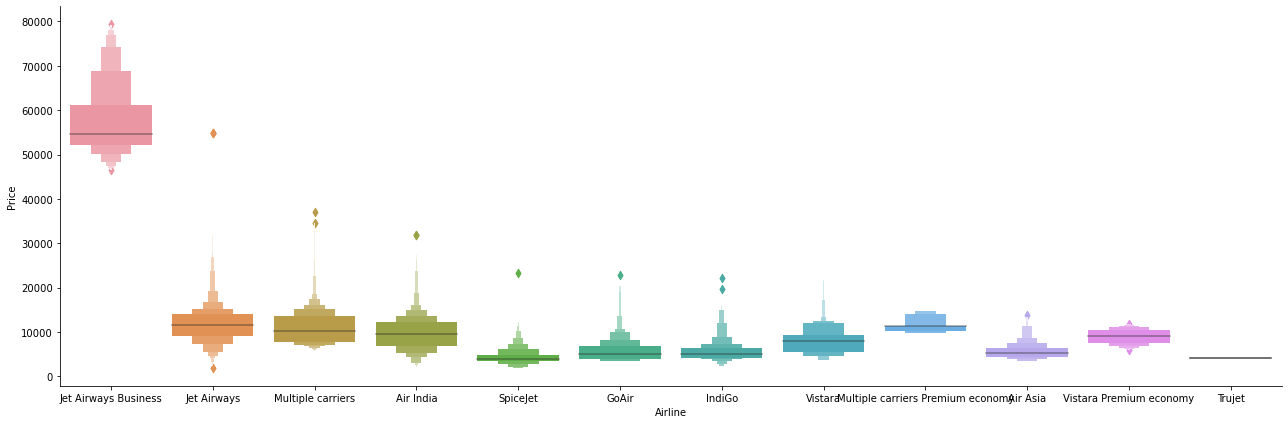

In [37]:
#checking the price as per respective airlines 
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Here jet airways showing the higest price and truejet shows lowest.indigo and go-airways ,spicejet almost similer price.

In [38]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

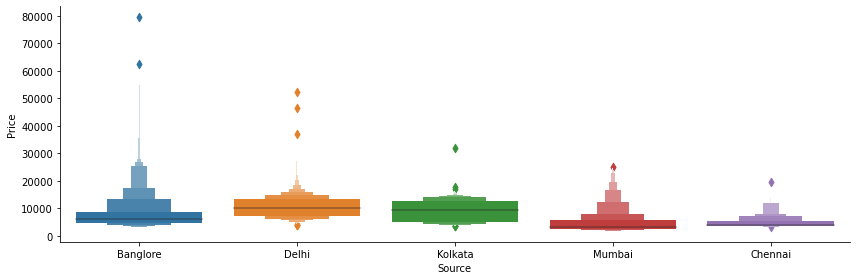

In [39]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [40]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [41]:
# df_train["Total_Stops"].value_counts()

In [42]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df_train['Total_Stops']=df_train['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [43]:
df_test['Total_Stops']=df_test['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [44]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df_train=df_train.drop(["Route", "Additional_Info"], axis = 1)

In [45]:
df_test=df_test.drop(["Route", "Additional_Info","Duration"], axis = 1)

In [60]:
df_train=pd.get_dummies(df_train,drop_first=True)

In [61]:
df_test=pd.get_dummies(df_test,drop_first=True)

In [68]:
df_train.head(1)

,Date_of_Journey,Total_Stops,Price,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,0,3897,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [69]:
df_test.head(1)

,Date_of_Journey,Total_Stops,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,1,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [72]:
df_train.isnull().sum()

Date_of_Journey                              0
Total_Stops                                  0
Price                                        0
Dep_hour                                     0
Dep_min                                      0
Arrv_hour                                    0
Arrv_min                                     0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

Here we have preprocess the data now our almost features are in binory so will will not remove the outliars.